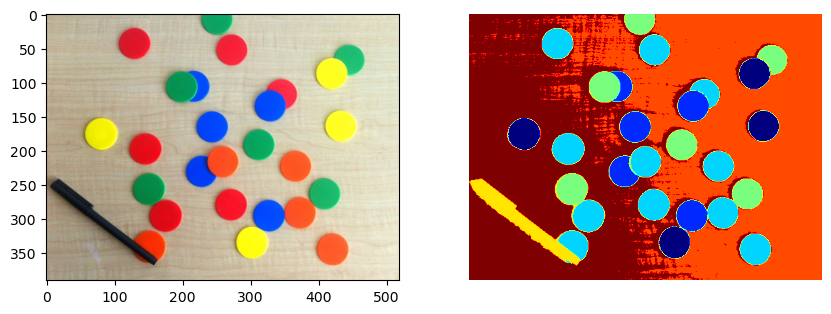

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('imdata/coloredChips.png')

# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3)).astype(np.float32)

# Define the number of clusters (segments) you want
num_clusters = 7  # Adjust as needed

# Perform k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Normalize the labels to a visible range
normalized_labels = (labels * 255 / (num_clusters - 1)).astype(np.uint8)

# Convert the normalized labels to the same shape as the original image
segmented_image = normalized_labels.reshape(image.shape[:2])

# Display the segmented image using matplotlib
fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='jet')  # Use the 'jet' colormap for better visibility
plt.axis('off')  # Turn off axis labels
plt.show()